In [363]:
# Load relevant modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [445]:
# Load data
energy_df=pd.read_csv('PRENEL01ZAQ656N.csv', index_col='DATE',parse_dates=True)

In [446]:
SA=pd.read_csv('cleaned_SA.csv')

In [447]:
energy_df.head()

,PRENEL01ZAQ656N
DATE,
1985-01-01,11072.666667
1985-04-01,11879.666667
1985-07-01,12485.333333
1985-10-01,11690.333333
1986-01-01,11374.000000


In [448]:
SA.head()

,Country Name,Country Code,Series Name,Series Code,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,South Africa,ZAF,"Population, total",SP.POP.TOTL,32678874,33495953,34297727,35100909,35930050,36800509,...,51216964,52004172,52834005,53689236,54545991,55386367,56203654,57000451,57779622,58558270
1,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,2.5955422942158,2.46958114893962,2.36544581912416,2.31479438179005,2.33469651468419,2.39376838817431,...,1.45528003824746,1.5253140838922,1.58310713698288,1.60575169931034,1.58316828741381,1.5289263067937,1.4648292142325,1.40774075042753,1.35769728766652,1.33861739063304
2,South Africa,ZAF,Surface area (sq. km),AG.SRF.TOTL.K2,1219090,1219090,1219090,1219090,1219090,1219090,...,1219090,1219090,1219090,1219090,1219090,1219090,1219090,1219090,1219090,..
3,South Africa,ZAF,Population density (people per sq. km of land ...,EN.POP.DNST,26.9385404215681,27.612092260261,28.2730275577245,28.9351235275206,29.6186185691086,30.3361737381398,...,42.2202507645764,42.8691787089169,43.5532441945775,44.2582462966474,44.9645046946228,45.6572612089787,46.3309845106299,46.987817062213,47.6301197767684,..
4,South Africa,ZAF,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,53.2,..,..,..,55.5,..,..,..,..,..


In [449]:
# Clean energy data
energy_df.rename(columns={'PRENEL01ZAQ656N':'Total Electricity Production'},inplace=True)

In [450]:
energy_df.reset_index(inplace=True)
energy_df.columns

Index(['DATE', 'Total Electricity Production'], dtype='object')

In [451]:
energy_df=energy_df.groupby(energy_df.DATE.dt.year).mean()

In [452]:
energy_df

,Total Electricity Production
DATE,
1985,11782.000000
1986,12116.166667
1987,12549.916667
1988,13061.500000
1989,13526.750000
1990,13782.000000
1991,14026.333333
1992,14007.500000
1993,14558.833333


Text(0.5, 1.0, 'The Evolution of Total Energy Production Over Time')

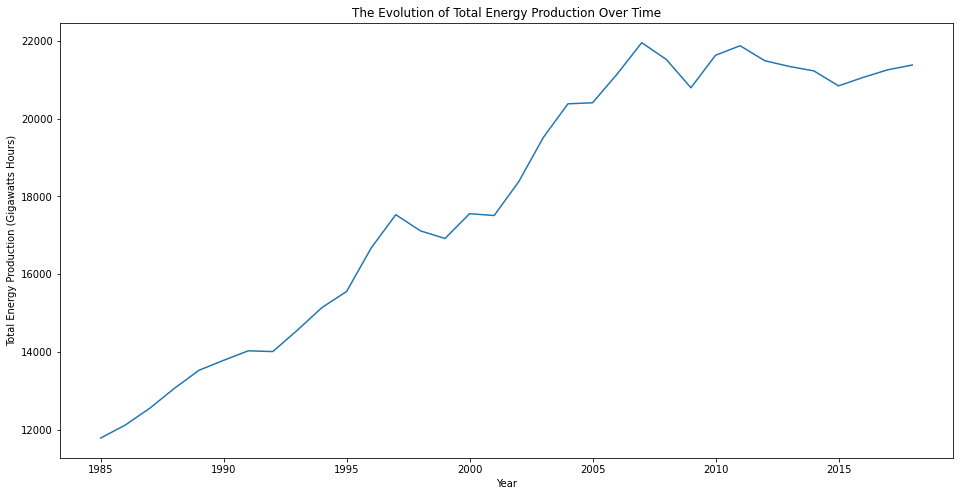

In [453]:
# Plot energy production over time
plt.figure(figsize=(16,8))
plt.plot(energy_df)
plt.xlabel('Year')
plt.ylabel('Total Energy Production (Gigawatts Hours)')
plt.title('The Evolution of Total Energy Production Over Time')

In [454]:
# Compute Energy growth rates
energy_df['Energy_Growth']=None
for i in range(0,len(energy_df)-1):
    last=energy_df['Total Electricity Production'].iloc[i]
    now=energy_df['Total Electricity Production'].iloc[i+1]
    energy_df['Energy_Growth'].iloc[i+1]= round((100*(now-last))/last,2)

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [455]:
energy_df

,Total Electricity Production,Energy_Growth
DATE,,
1985,11782.000000,None
1986,12116.166667,2.84
1987,12549.916667,3.58
1988,13061.500000,4.08
1989,13526.750000,3.56
1990,13782.000000,1.89
1991,14026.333333,1.77
1992,14007.500000,-0.13
1993,14558.833333,3.94


In [456]:
# Seperate energy growths into two groups for plotting
recent=energy_df['Energy_Growth'].iloc[-10:]
others=energy_df['Energy_Growth'].iloc[:-10]
en=energy_df.drop(columns='Total Electricity Production')

Text(0.5, 1.0, 'Yearly Growth Rates over time')

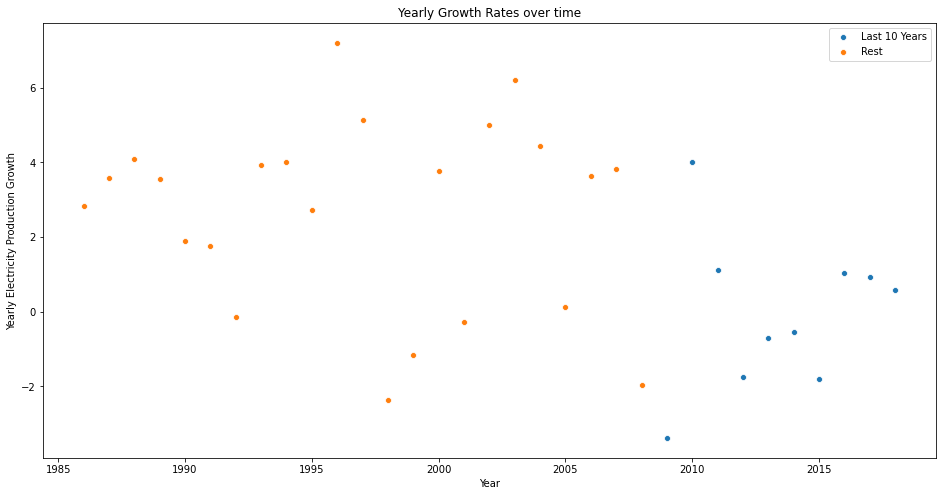

In [457]:
plt.figure(figsize=(16,8))
sns.scatterplot(recent.index,recent.values,label='Last 10 Years')
sns.scatterplot(others.index,others.values,label='Rest')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Yearly Electricity Production Growth')
plt.title('Yearly Growth Rates over time')

In [377]:
# Let's move on the cleaning economic dataset for South Africa
col=list(SA['Series Name'].values)
SA.drop(columns=['Country Name','Country Code','Series Code'],inplace=True)

In [378]:
SA=SA.T

In [379]:
SA.columns=col

In [380]:
SA.dropna(axis=1,inplace=True)

In [381]:
SA.drop(index='Series Name',inplace=True)

In [382]:
SA.columns

Index(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Population density (people per sq. km of land area)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Im

In [383]:
SA.replace('..',np.nan,inplace=True)

In [384]:
# See which variables have the most non-null features so we can select them for our model
SA.notnull().sum().sort_values(ascending=False)

Urban population growth (annual %)                                             34
Gross capital formation (% of GDP)                                             34
Population growth (annual %)                                                   34
GNI, Atlas method (current US$)                                                34
GNI per capita, Atlas method (current US$)                                     34
Mortality rate, under-5 (per 1,000 live births)                                34
Immunization, measles (% of children ages 12-23 months)                        34
Foreign direct investment, net inflows (BoP, current US$)                      34
GDP (current US$)                                                              34
GDP growth (annual %)                                                          34
Inflation, GDP deflator (annual %)                                             34
Agriculture, forestry, and fishing, value added (% of GDP)                     34
Industry (includ

In [385]:
# Feature Selection
df=SA[['GDP growth (annual %)','Life expectancy at birth, total (years)'
       ,'GNI per capita, Atlas method (current US$)',
       'CO2 emissions (metric tons per capita)',
       'Foreign direct investment, net inflows (BoP, current US$)','School enrollment, primary (% gross)']]

In [386]:
df.replace('..',np.nan,inplace=True)

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [387]:
# Check which variables we need to impute 
df.isnull().sum()

GDP growth (annual %)                                        0
Life expectancy at birth, total (years)                      1
GNI per capita, Atlas method (current US$)                   0
CO2 emissions (metric tons per capita)                       3
Foreign direct investment, net inflows (BoP, current US$)    0
School enrollment, primary (% gross)                         6
dtype: int64

In [464]:
# Find out the missing values through other sources
df['Life expectancy at birth, total (years)'].fillna(63.87,inplace=True)

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [465]:
# Find out CO2 emissions for missing years
# 2018 - 8.3
df['CO2 emissions (metric tons per capita)'].iloc[-2]=8.3
# 2017 - 7.43 https://www.statista.com/statistics/270508/co2-emissions-per-capita-by-country/
df['CO2 emissions (metric tons per capita)'].iloc[-3]=7.43
# 2019 - can't find any value so we will assume the rate of increase is the same as 2017 to 2018
df['CO2 emissions (metric tons per capita)'].iloc[-1]=9.27

<ipython-input-465-30106f2e2ccd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2 emissions (metric tons per capita)'].iloc[-2]=8.3
<ipython-input-465-30106f2e2ccd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2 emissions (metric tons per capita)'].iloc[-3]=7.43
<ipython-input-465-30106f2e2ccd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CO2 emissions (metric tons per capita)'].iloc[-1]=9.27


In [466]:
from pyts.preprocessing import InterpolationImputer 
imputer=InterpolationImputer()
imputed=imputer.transform(df.astype('float'))
df_imputed=pd.DataFrame(imputed,columns=df.columns,index=df.index)
df_imputed

,GDP growth (annual %),"Life expectancy at birth, total (years)","GNI per capita, Atlas method (current US$)",CO2 emissions (metric tons per capita),"Foreign direct investment, net inflows (BoP, current US$)","School enrollment, primary (% gross)"
1985,-1.211484,60.946,2130.0,9.921215,-4.526437e+08,-9.052873e+08
1986,0.017835,61.540,1990.0,9.877464,-5.048707e+07,8.016656e+01
1987,2.100735,62.109,2210.0,9.593208,-1.916680e+08,8.126303e+01
1988,4.200133,62.619,2670.0,9.773399,1.584372e+08,8.119705e+01
1989,2.394784,63.035,2830.0,9.493669,-2.012084e+08,1.052561e+02
1990,-0.317786,63.307,2860.0,8.513600,-7.572241e+07,1.048057e+02
1991,-1.018220,63.384,3000.0,8.653758,2.541336e+08,1.056041e+02
1992,-2.137057,63.247,3250.0,7.801071,3.358018e+06,6.716029e+06
1993,1.233520,62.894,3380.0,8.100407,1.129055e+07,2.258108e+07
1994,3.200001,62.331,3510.0,8.361297,3.744104e+08,1.094116e+02


In [467]:
# Everything looks good except for 1985,2018, and 2019 School Enrollment Primary 
# we will just impute the nearest value from previous years and trends 
df_imputed['School enrollment, primary (% gross)'].iloc[0]=80
df_imputed['School enrollment, primary (% gross)'].iloc[-1]=100
df_imputed['School enrollment, primary (% gross)'].iloc[-2]=100

In [468]:
# Compute growth rates for each metric (except GDP growth since that is already calcuated)
compute_growth=df_imputed.columns[1:]
for col in compute_growth:
    col_name=(col+' Growth')
    df_imputed[col_name]=None
    for i in range(0,len(df_imputed)-1):
        last=df_imputed[col].iloc[i]
        now=df_imputed[col].iloc[i+1]
        df_imputed[col_name].iloc[i+1]= round((100*(now-last))/last,2)

/Users/shailmirpuri/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [393]:
df_imputed

,GDP growth (annual %),"Life expectancy at birth, total (years)","GNI per capita, Atlas method (current US$)",CO2 emissions (metric tons per capita),"Foreign direct investment, net inflows (BoP, current US$)","School enrollment, primary (% gross)","Life expectancy at birth, total (years) Growth","GNI per capita, Atlas method (current US$) Growth",CO2 emissions (metric tons per capita) Growth,"Foreign direct investment, net inflows (BoP, current US$) Growth","School enrollment, primary (% gross) Growth"
1985,-1.211484,60.946000,2130.0,9.921215,-4.526437e+08,8.000000e+01,None,None,None,None,None
1986,0.017835,61.540000,1990.0,9.877464,-5.048707e+07,8.016656e+01,0.97,-6.57,-0.44,-88.85,0.21
1987,2.100735,62.109000,2210.0,9.593208,-1.916680e+08,8.126303e+01,0.92,11.06,-2.88,279.64,1.37
1988,4.200133,62.619000,2670.0,9.773399,1.584372e+08,8.119705e+01,0.82,20.81,1.88,-182.66,-0.08
1989,2.394784,63.035000,2830.0,9.493669,-2.012084e+08,1.052561e+02,0.66,5.99,-2.86,-227,29.63
1990,-0.317786,63.307000,2860.0,8.513600,-7.572241e+07,1.048057e+02,0.43,1.06,-10.32,-62.37,-0.43
1991,-1.018220,63.384000,3000.0,8.653758,2.541336e+08,1.056041e+02,0.12,4.9,1.65,-435.61,0.76
1992,-2.137057,63.247000,3250.0,7.801071,3.358018e+06,6.716029e+06,-0.22,8.33,-9.85,-98.68,6.35953e+06
1993,1.233520,62.894000,3380.0,8.100407,1.129055e+07,2.258108e+07,-0.56,4,3.84,236.23,236.23
1994,3.200001,62.331000,3510.0,8.361297,3.744104e+08,1.094116e+02,-0.9,3.85,3.22,3216.14,-100


In [394]:
# Drop 1985 column and drop all the column that we have a growth equvi for 
df_imputed.drop(index='1985',inplace=True)

In [395]:
df_imputed.drop(columns=compute_growth,inplace=True)

In [396]:
#Let's Normalize all our features
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
scaled=norm.fit_transform(df_imputed)
scaled_df=pd.DataFrame(scaled,columns=df_imputed.columns,index=df_imputed.index)

In [397]:
# Let's take the receproical of CO2 emissions then scale it back down
scaled_df['1/CO2 emissions (metric tons per capita) Growth']=1/scaled_df['CO2 emissions (metric tons per capita) Growth']

In [398]:
# Min value is 20% higher than the second min so we will make this transformation 
v=11.797*1.2
scaled_df['1/CO2 emissions (metric tons per capita) Growth'].iloc[-3]=v
scaled_df

,GDP growth (annual %),"Life expectancy at birth, total (years) Growth","GNI per capita, Atlas method (current US$) Growth",CO2 emissions (metric tons per capita) Growth,"Foreign direct investment, net inflows (BoP, current US$) Growth","School enrollment, primary (% gross) Growth",1/CO2 emissions (metric tons per capita) Growth
1986,0.278379,0.000643,0.048286,0.489353,0.094957,6.805567e-08,2.043515
1987,0.547458,0.000633,0.264897,0.389435,0.195865,6.884346e-08,2.567823
1988,0.818668,0.000611,0.384691,0.584357,0.069268,6.785872e-08,1.711282
1989,0.585445,0.000576,0.202605,0.390254,0.057126,8.803569e-08,2.562434
1990,0.235022,0.000527,0.142032,0.084767,0.102209,6.762102e-08,11.797101
1991,0.144537,0.000460,0.189212,0.574939,0.000000,6.842919e-08,1.739316
1992,0.000000,0.000386,0.231355,0.104013,0.092265,4.319016e-03,9.614173
1993,0.435427,0.000313,0.178155,0.664619,0.183978,2.283440e-07,1.504621
1994,0.689466,0.000240,0.176312,0.639230,1.000000,0.000000e+00,1.564382
1995,0.676547,0.000166,0.174469,0.694103,0.183214,6.882988e-08,1.440708


In [399]:
# Rescale our data back down between 0 and 1 
CO2rscale=MinMaxScaler()
scaled=norm.fit_transform(scaled_df)
train=pd.DataFrame(scaled,columns=scaled_df.columns,index=scaled_df.index)

In [400]:
train.drop(columns='CO2 emissions (metric tons per capita) Growth',inplace=True)

In [401]:
# Our final dataset
train=train.astype('float')
train

,GDP growth (annual %),"Life expectancy at birth, total (years) Growth","GNI per capita, Atlas method (current US$) Growth","Foreign direct investment, net inflows (BoP, current US$) Growth","School enrollment, primary (% gross) Growth",1/CO2 emissions (metric tons per capita) Growth
1986,0.278379,0.000643,0.048286,0.094957,6.805567e-08,0.079316
1987,0.547458,0.000633,0.264897,0.195865,6.884346e-08,0.119168
1988,0.818668,0.000611,0.384691,0.069268,6.785872e-08,0.054064
1989,0.585445,0.000576,0.202605,0.057126,8.803569e-08,0.118759
1990,0.235022,0.000527,0.142032,0.102209,6.762102e-08,0.820673
1991,0.144537,0.000460,0.189212,0.000000,6.842919e-08,0.056194
1992,0.000000,0.000386,0.231355,0.092265,4.319016e-03,0.654752
1993,0.435427,0.000313,0.178155,0.183978,2.283440e-07,0.038356
1994,0.689466,0.000240,0.176312,1.000000,0.000000e+00,0.042898
1995,0.676547,0.000166,0.174469,0.183214,6.882988e-08,0.033498


In [402]:
# Let's now perform KMeans Cluster 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(train)
train['Cluster']=kmeans.labels_

In [403]:
train

,GDP growth (annual %),"Life expectancy at birth, total (years) Growth","GNI per capita, Atlas method (current US$) Growth","Foreign direct investment, net inflows (BoP, current US$) Growth","School enrollment, primary (% gross) Growth",1/CO2 emissions (metric tons per capita) Growth,Cluster
1986,0.278379,0.000643,0.048286,0.094957,6.805567e-08,0.079316,2
1987,0.547458,0.000633,0.264897,0.195865,6.884346e-08,0.119168,1
1988,0.818668,0.000611,0.384691,0.069268,6.785872e-08,0.054064,1
1989,0.585445,0.000576,0.202605,0.057126,8.803569e-08,0.118759,1
1990,0.235022,0.000527,0.142032,0.102209,6.762102e-08,0.820673,0
1991,0.144537,0.000460,0.189212,0.000000,6.842919e-08,0.056194,2
1992,0.000000,0.000386,0.231355,0.092265,4.319016e-03,0.654752,0
1993,0.435427,0.000313,0.178155,0.183978,2.283440e-07,0.038356,2
1994,0.689466,0.000240,0.176312,1.000000,0.000000e+00,0.042898,1
1995,0.676547,0.000166,0.174469,0.183214,6.882988e-08,0.033498,1


In [404]:
# Summary features for each cluster
clustered_df=train.groupby(['Cluster']).mean()
clustered_df

,GDP growth (annual %),"Life expectancy at birth, total (years) Growth","GNI per capita, Atlas method (current US$) Growth","Foreign direct investment, net inflows (BoP, current US$) Growth","School enrollment, primary (% gross) Growth",1/CO2 emissions (metric tons per capita) Growth
Cluster,,,,,,
0,0.231277,0.000493,0.162960,0.103942,1.439717e-03,0.825141
1,0.717240,0.000431,0.220647,0.201611,5.000006e-02,0.092164
2,0.322252,0.100485,0.095933,0.111050,8.384070e-08,0.068902


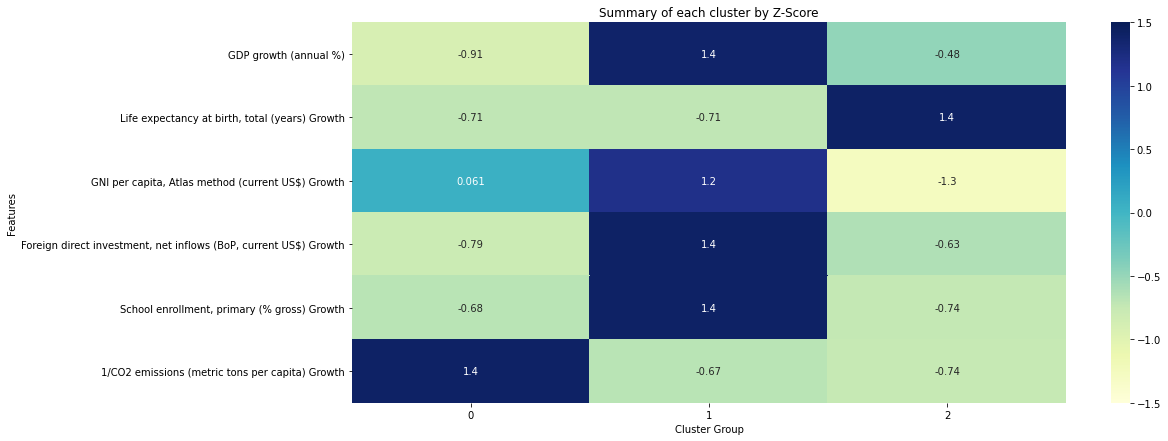

In [405]:
# Let's Standardize each cluster for compare across clusters
from scipy import stats
clustered_df1=clustered_df.apply(stats.zscore)
f,ax=plt.subplots(figsize=(16,7))
rows=clustered_df1.T
sns.heatmap(rows,annot=True,cmap="YlGnBu",vmin=-1.5,vmax=1.5)
plt.ylabel('Features')
plt.xlabel('Cluster Group')
plt.title('Summary of each cluster by Z-Score')
plt.show()

In [406]:
train['Cluster']

1986    2
1987    1
1988    1
1989    1
1990    0
1991    2
1992    0
1993    2
1994    1
1995    1
1996    1
1997    1
1998    2
1999    1
2000    1
2001    1
2002    1
2003    1
2005    1
2006    1
2007    1
2008    1
2009    2
2010    1
2011    1
2012    1
2013    1
2014    2
2015    2
2016    2
2017    0
2018    2
2019    2
Name: Cluster, dtype: int32

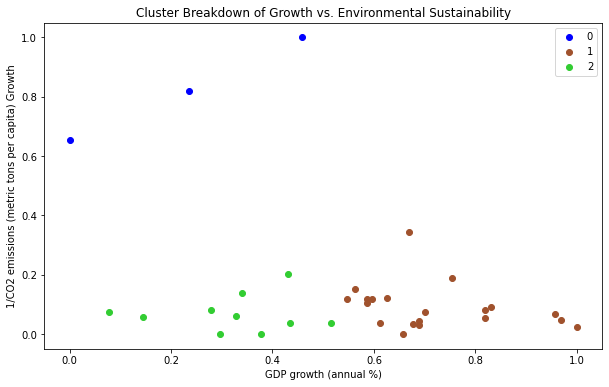

In [407]:
# Visualize cluster breakdown
f,ax=plt.subplots(figsize=(10,6))
colors = ["blue", "sienna", "limegreen"]
for r in range(0,3):
    clustered = train[train["Cluster"] == int(r)]
    plt.scatter(clustered['GDP growth (annual %)'], clustered['1/CO2 emissions (metric tons per capita) Growth'], 
                color=colors[r],label=r)
    plt.legend()
    plt.xlabel('GDP growth (annual %)')
    plt.ylabel('1/CO2 emissions (metric tons per capita) Growth')
    plt.title('Cluster Breakdown of Growth vs. Environmental Sustainability')

## 3 Cluster interpretations:
Group 0 - Environmentally Friendly Year

Group 1 - Strong Economic Growth 

Group 2 - Poor Performing Years (Lack of Economic Growth and Growing Carbon Emissions) 


In [408]:
# Let's finally compare the clusters in terms of Energy Growth in that Year
energy_df.reset_index(inplace=True)
train.reset_index(inplace=True)

In [418]:
train['index']=pd.to_datetime(train['index']).dt.year

In [419]:
# Join our two datasets
SA_overall=train.merge(energy_df,how='left',left_on='index',right_on='DATE')

In [421]:
SA_overall.drop(columns='DATE',inplace=True)

In [435]:
SA_overall['Energy_Growth']=SA_overall['Energy_Growth'].astype('float')

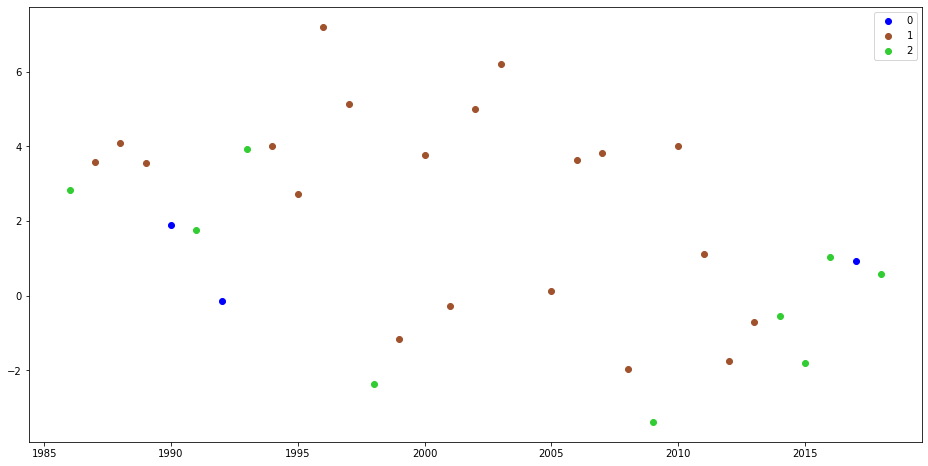

In [436]:
# Year on year energy growth broken down by cluster
colors = ["blue", "sienna", "limegreen"]
plt.figure(figsize=(16,8))
for i in range(0,3):
    p=SA_overall.loc[SA_overall['Cluster']==i]
    plt.scatter(p['index'],p['Energy_Growth'],color=colors[i],label=i)
plt.legend()
plt.show()

In [462]:
# Compare cluster averages of yearly energy growth 
Compare=SA_overall.groupby(['Cluster'])['Energy_Growth'].mean()
Compare.index=['Environmentally Friendly','Strong Economic Growth','Poor Performing']

Text(0.5, 1.0, 'Breakdown of Energy Growth by Cluster')

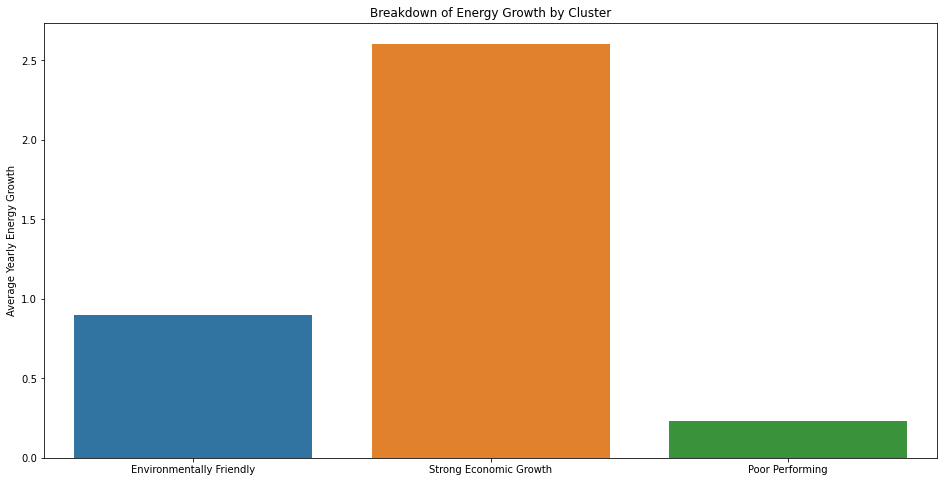

In [463]:
plt.figure(figsize=(16,8))
sns.barplot(Compare.index,Compare.values)
plt.ylabel('Average Yearly Energy Growth')
plt.title('Breakdown of Energy Growth by Cluster')